# Proyek Analisis Data: [**Bike Sharing Dataset**]
- **Nama:** [Fedonata Nur A]
- **Email:** [fedonata027@gmail.com]
- **ID Dicoding:** [fedonata]

## Menentukan Pertanyaan Bisnis

1. bagaimana tren penggunaan bike-sharing dalam 2011-2012?
2. bagaimana pola penggunaan bike-sharing berubah sepanjang hari?
3. bagaimana pengaruh hari kerja dan hari libur pada bike-sharing?
4. Bagaimana musim memengaruhi pola penggunaan layanan bike-sharing?
5. bagaimana korelasi antara suhu(temp dan atemp), kelembapan (humadity) dan kecepatan angin(windspeed) dengan tingkat penggunaan bike-sharing?

## Import Semua Packages/Library yang Digunakan

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

tahap ini merupakan tahal awal pada proyek analisis ini yang mana data dikumpukan dari dataset yang telah disediakan oleh dicoding yang mana berasal dari kaggle. Saya memilih salah satu dataset yang telah disediakan yaitu **Bike Sharing Dataset** . data terbagi menjadi 2 bagian yaitu data harian dan data jam

In [92]:
#data day
day_df = pd.read_csv("//content/drive/MyDrive/project/bangkit /dicoding/submission dicoding /bike_sharing/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [93]:
#data hour
hour_df=pd.read_csv('/content/drive/MyDrive/project/bangkit /dicoding/submission dicoding /bike_sharing/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

*Assess day data*

In [94]:
#cek data type
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


*   dapat dilihat , setelah cek data type terdapat 1 data yang tidak sesuai yaitu dteday(object) sehingga harus diubah menjadi datetime
*   pada beberapa variabel ( season, weekday dan mnth) direpresentasikan dalam bilangan bilat sehingga bisa diubah menjadi nilai yang sebenarnya ( string) demikian juga pada variabel yr



In [95]:
#cek missing value
print('jumlah missing value dari tiap features: ', day_df.isnull().sum())

jumlah missing value dari tiap features:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


dapat dilihat bahwa tidak ada missing value pada day data

In [96]:
#cek duplicated data
print('jumlah duplicated data :', day_df.duplicated().sum())

jumlah duplicated data : 0


dapat dilihat bahwa jumlah duplikasi data pada day data yaitu 0 (tidak ada)

In [97]:
#cek nilai statistik dari day data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dapat dilihat tidak ada nilai aneh dari day data

***Assess hour data***

In [98]:
#cek data type
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*   dapat dilihat , setelah cek data type terdapat 1 data yang tidak sesuai yaitu dteday(object) sehingga harus diubah menjadi datetime
*   pada beberapa variabel ( season, weekday dan mnth) direpresentasikan dalam bilangan bilat sehingga bisa diubah menjadi nilai yang sebenarnya ( string) demikian juga pada variabel yr



In [99]:
#cek missing value
print('jumlah missing value pada tiap features: ',hour_df.isnull().sum())

jumlah missing value pada tiap features:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


dapat dilihat bahwa tidak ada missing value pada hour_data

In [100]:
#cek duplicated data
print('jumlah duplicated data : ', hour_df.duplicated().sum())

jumlah duplicated data :  0


dapat dilihat bahwa tidak ada duplikasi data pada hour_data

In [101]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**kesimpulan dari assesing data dapat ditarik point sebagai berikut:**
*   dteday(object) harus diubah menjadi datetime
*   pada beberapa variabel ( season, weekday dan mnth) a diubah menjadi nilai yang sebenarnya ( string) demikian juga pada variabel yr
*   perbaikan beberapa nama variabel agar terlihat jelas



### Cleaning Data

####day data

In [102]:
#convert dteday(object) menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [103]:
# Untuk kolom 'season'
unique_seasons = day_df['season'].unique()
print("Nilai unik dalam kolom 'season':", unique_seasons)

# Untuk kolom 'weekday'
unique_weekdays = day_df['weekday'].unique()
print("Nilai unik dalam kolom 'weekday':", unique_weekdays)

# Untuk kolom 'mnth'
unique_months = day_df['mnth'].unique()
print("Nilai unik dalam kolom 'mnth':", unique_months)


Nilai unik dalam kolom 'season': [1 2 3 4]
Nilai unik dalam kolom 'weekday': [6 0 1 2 3 4 5]
Nilai unik dalam kolom 'mnth': [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [104]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


pada beberapa variabel ( season,weathersit, weekday,dan mnth)  diubah menjadi nilai yang sebenarnya ( string) demikian juga pada variabel yr

In [105]:
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear/Few clouds',2:'Mist',3: 'Light Snow',4: 'Heavy Rain'})
day_df['weekday'] = pd.to_datetime(day_df['dteday']).dt.day_name()
day_df['mnth'] = pd.to_datetime(day_df['dteday']).dt.month_name()
day_df['yr'] = day_df['dteday'].dt.year


In [106]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [107]:
# Mengubah nama judul kolom agar terlihat jelas
day_df = day_df.rename({
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count',
    'weathersit': 'weather',
    'hum' : 'humidity'
}, axis='columns')

day_df.head()


,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


data telah dibersihkan dan siap untuk dilakukan EDA

####hour data

lakukan hal yang sama pada hour data seperti apa yang dilakukan pada day data pada saat cleaning data

In [108]:
#convert dteday(object) menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [109]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [110]:
hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['weathersit'] = hour_df['weathersit'].map({1: 'Clear/Few clouds',2:'Mist',3: 'Light Snow',4: 'Heavy Rain'})
hour_df['weekday'] = pd.to_datetime(hour_df['dteday']).dt.day_name()
hour_df['mnth'] = pd.to_datetime(hour_df['dteday']).dt.month_name()
hour_df['yr'] = hour_df['dteday'].dt.year

In [111]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear/Few clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear/Few clouds,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear/Few clouds,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear/Few clouds,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear/Few clouds,0.24,0.2879,0.75,0.0,0,1,1


In [112]:
# Mengubah nama judul kolom agar terlihat jelas
hour_df = hour_df.rename({
    'dteday': 'dateday',
    'yr': 'year',
    'hr':'hour',
    'mnth': 'month',
    'cnt': 'count',
    'weathersit': 'weather',
    'hum' : 'humidity'
}, axis='columns')

hour_df.head()


,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Clear/Few clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Clear/Few clouds,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Clear/Few clouds,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,Clear/Few clouds,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,Clear/Few clouds,0.24,0.2879,0.75,0.0,0,1,1


kedua data telah dibersihkan dan siap untuk dilakukan EDA

## Exploratory Data Analysis (EDA)

### Explore ...

In [113]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    int64         
 4   month       731 non-null    object        
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [114]:
day_df.head(10)

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear/Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear/Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear/Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,2011,January,0,Thursday,1,Clear/Few clouds,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,2011,January,0,Friday,1,Mist,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,2011,January,0,Saturday,0,Mist,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,2011,January,0,Sunday,0,Clear/Few clouds,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,2011,January,0,Monday,1,Clear/Few clouds,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [115]:
day_df.describe(include="all")

<ipython-input-115-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,January,NaN,Saturday,NaN,Clear/Few clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan rangkuman parameter statistik di atas, tidak ada nilai yang aneh pada data

In [116]:
day_df.groupby(by="season").agg({'count':'sum','casual':'sum','registered':'sum'}).reset_index()

,season,count,casual,registered
0,Fall,1061129,226091,835038
1,Spring,471348,60622,410726
2,Summer,918589,203522,715067
3,Winter,841613,129782,711831


dapat dilihat bahwa bike-sharing tertinggi berada pada musim gugur(fall season) dengan jumlah total yaitu 1061129 dengan rincian yaitu casual sebanyak 226091 dan registered sebanyak 835038

In [117]:
day_df.groupby(by="year").agg({'count':'sum','casual':'sum','registered':'sum'}).reset_index()

,year,count,casual,registered
0,2011,1243103,247252,995851
1,2012,2049576,372765,1676811


berdasarkan hasil yang diperoleh bahwa tahun 2012 merupakan tahun dengan penggunaan layanan bike-sharing lebih tinggi daripada tahun 2011

In [118]:
result = day_df.groupby(by="month").agg({'count':'sum','casual':'sum','registered':'sum'}).reset_index()

# Urutkan DataFrame berdasarkan jumlah total perjalanan dari yang terbesar ke yang terkecil
result.sort_values(by='count', ascending=False)

,month,count,casual,registered
1,August,351194,72039,279155
6,June,346342,73906,272436
11,September,345991,70323,275668
5,July,344948,78157,266791
8,May,331686,75285,256401
10,October,322352,59760,262592
0,April,269094,60802,208292
9,November,254831,36603,218228
7,March,228920,44444,184476
2,December,211036,21693,189343


dapat dilihat bulan tertinggi untuk bike-sharing yaitu pada bulan agustus

In [119]:
day_df.groupby(by="holiday").agg({'count':'sum','casual':'sum','registered':'sum'}).reset_index()

,holiday,count,casual,registered
0,0,3214244,597658,2616586
1,1,78435,22359,56076


berdasarkan hasil di atas holiday menghasilkan jumlah penggunaan layanan lebih kecil dibandingkan not holiday

In [120]:
day_df.groupby(by="weekday").agg({'count':'sum','casual':'sum','registered':'sum'}).reset_index().sort_values(by='count', ascending=False)

,weekday,count,casual,registered
0,Friday,487790,78238,409552
4,Thursday,485395,61460,423935
2,Saturday,477807,153852,323955
6,Wednesday,473048,57319,415729
5,Tuesday,469109,57843,411266
1,Monday,455503,70784,384719
3,Sunday,444027,140521,303506


berdasarkan hasil diatas hari jumat merupakan hari dengan peminjaman (bike-sharing) tertinggi

In [121]:
day_df.groupby(by="workingday").agg({'count':'sum','casual':'sum','registered':'sum'}).reset_index()

,workingday,count,casual,registered
0,0,1000269,316732,683537
1,1,2292410,303285,1989125


berdasarkan hasil diatas dapat dilihat bahwa hari kerja menghasilkan jumlah peminjaman 1000269 sedangkan bukan hari kerja menghasilkan jumlah 2292410

jika menggunakan parameter holiday maka dihasilkan bahwa pada hari libur menghasilkan jumlah peminjaman yaitu 78435 sedangkan bukan hari libur menghasilkan jumlah peminjaman yaitu 3214244

In [122]:
average_rentals_by_workingday = day_df.groupby('workingday')['count'].mean()

print("Rata-rata jumlah peminjaman pada hariby_wo kerja:")
print("Hari Kerja: ", average_rentals_by_workingday[1])
print("Hari Libur: ", average_rentals_by_workingday[0])

Rata-rata jumlah peminjaman pada hariby_wo kerja:
Hari Kerja:  4584.82
Hari Libur:  4330.168831168831


dapat dilihat bahwa rata rata jumlah bike sharing lebih banyak pada hari kerja daripada hari libur

In [123]:
day_df.groupby(by="weather").agg({'count':'sum','casual':'sum','registered':'sum'}).reset_index()

,weather,count,casual,registered
0,Clear/Few clouds,2257952,446346,1811606
1,Light Snow,37869,3895,33974
2,Mist,996858,169776,827082


berdasarkan parameter cuaca terlihat bahwa orang orang cenderung menggunakan layanan bike-sharing pada saat cuaca cerah

## Visualization & Explanatory Analysis

### Pertanyaan 1: 1. bagaimana tren penggunaan layanan bike-sharing dalam 2011-2012?

In [137]:
data_2011_2012 = day_df[(day_df['dateday'].dt.year >= 2011) & (day_df['dateday'].dt.year <= 2012)]

daily_total_rides = data_2011_2012.groupby('dateday')['count'].sum().reset_index()
fig = px.line(daily_total_rides, x='dateday', y='count', title='Bike-Sharing Trend (2011 - 2012)')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Total Rides')
fig.show()

agar lebih jelas tren penggunaannya kita akan menggunakan parameter 'month'

In [139]:
result = day_df.resample(rule='M', on='dateday').agg({"count": "sum", "casual": "sum", "registered": "sum"})
fig = px.line(result, x=result.index.strftime('%B %Y'), y=['count', 'casual', 'registered'],
              title="Monthly Count of Bikeshare Rides",
              labels={'x': 'Month', 'y': 'Total'},
              markers=True)
fig.show()


Berdasarkan grafik, terlihat bahwa jumlah perjalanan bersepeda berbagi bulanan mengikuti tren musiman. Penggunaan sepeda paling tinggi terjadi pada bulan-bulan musim panas (Juni hingga September) dan paling rendah pada bulan-bulan musim dingin (Desember hingga Februari). Hal ini menunjukkan bahwa orang cenderung lebih sering menggunakan sepeda berbagi saat cuaca bagus.

### Pertanyaan 2:bagaimana pola penggunaan bike-sharing berubah sepanjang hari?

In [141]:
result = hour_df.groupby(by="hour").agg({'count':'sum','casual':'sum','registered':'sum'}).reset_index()
# Plot using Plotly Express
fig = px.line(result, x='hour', y=['count', 'casual', 'registered'],
              labels={'hour': 'Hour', 'value': 'Total Rides', 'variable': 'Type'},
              title='Hourly Bike-sharing Rides',
              markers=True)

fig.update_layout(xaxis=dict(tickmode='linear', dtick=1),
                  yaxis_title='Total Rides')
fig.show()


dapat disimpulkan berdasarkan grafik pola penggunaan bike-sharing berdasarkan waktu dalam sehari yaitu pada jam 07.00 - 17.00

### Pertanyaan 3:bagaimana pengaruh hari kerja dan hari libur pada bike-sharing?

In [155]:
bar_width = 0.2

workingday_df = day_df.groupby(by="workingday").agg({'count':'sum', 'casual':'sum', 'registered':'sum'}).reset_index()
holiday_df = day_df.groupby(by="holiday").agg({'count':'sum', 'casual':'sum', 'registered':'sum'}).reset_index()

# Plot for working days
fig1 = px.bar(workingday_df, x='workingday', y=['count', 'casual', 'registered'],
              barmode='group', title='Working Day',
              labels={'value': 'Number of Rentals', 'variable': 'Rental Type'})

# Plot for holidays
fig2 = px.bar(holiday_df, x='holiday', y=['count', 'casual', 'registered'],
              barmode='group', title='Holiday',
              labels={'value': 'Number of Rentals', 'variable': 'Rental Type'})

fig1.show()
fig2.show()

In [158]:
workingday_df = day_df.groupby(by="workingday").agg({'count':'mean', 'casual':'mean', 'registered':'mean'}).reset_index()
holiday_df = day_df.groupby(by="holiday").agg({'count':'mean', 'casual':'mean', 'registered':'mean'}).reset_index()

# Plot for working days
fig1 = px.bar(workingday_df, x='workingday', y=['count', 'casual', 'registered'],
              barmode='group', title='Working Day',
              labels={'value': 'Number of Rentals', 'variable': 'Rental Type'})

# Plot for holidays
fig2 = px.bar(holiday_df, x='holiday', y=['count', 'casual', 'registered'],
              barmode='group', title='Holiday',
              labels={'value': 'Number of Rentals', 'variable': 'Rental Type'})

fig1.show()
fig2.show()


berdasarkan plot yang telah dibuat bahwa ketika menggunakan parameter working_day akan menghasilkan rata rata bahwa working day(4584.82) lebih tinggi daripada not working day(4330.17) demikian juga ketika menggunakan paramter holiday, not holiday lebih tinggi daripada holiday

### Pertanyaan 4: Bagaimana musim memengaruhi pola penggunaan layanan bike-sharing?

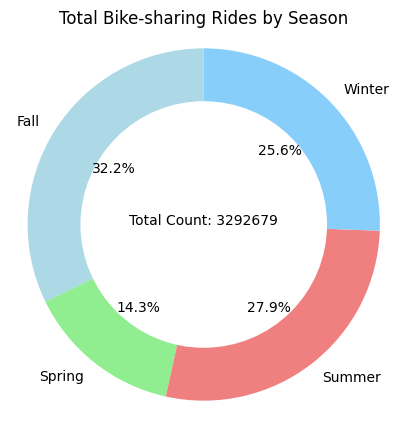

In [160]:
# Grouping data by season and aggregating total counts
result = day_df.groupby(by="season").agg({'count':'sum','casual':'sum','registered':'sum'}).reset_index()

# Data
season_labels = result['season']
total_counts = result['count']

# Plot donut chart
plt.figure(figsize=(5, 5))
patches, texts, _ = plt.pie(total_counts, labels=season_labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Total Bike-sharing Rides by Season')

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add total count text
plt.text(0, 0, f'Total Count: {total_counts.sum()}', fontdict={'fontsize': 10}, ha='center')

# Tampilkan plot
plt.axis('equal')
plt.show()


terlihat bahwa musim gugur (fall) merupakan musim dengan bike-sharing tertinggi dengan 32.2% sedangkan musim semi merupakan musim terendah dengan 14.3%

### Pertanyaan 5: bagaimana korelasi antara suhu(temp dan atemp), kelembapan (humadity) dan kecepatan angin(windspeed) dengan tingkat penggunaan bike-sharing?

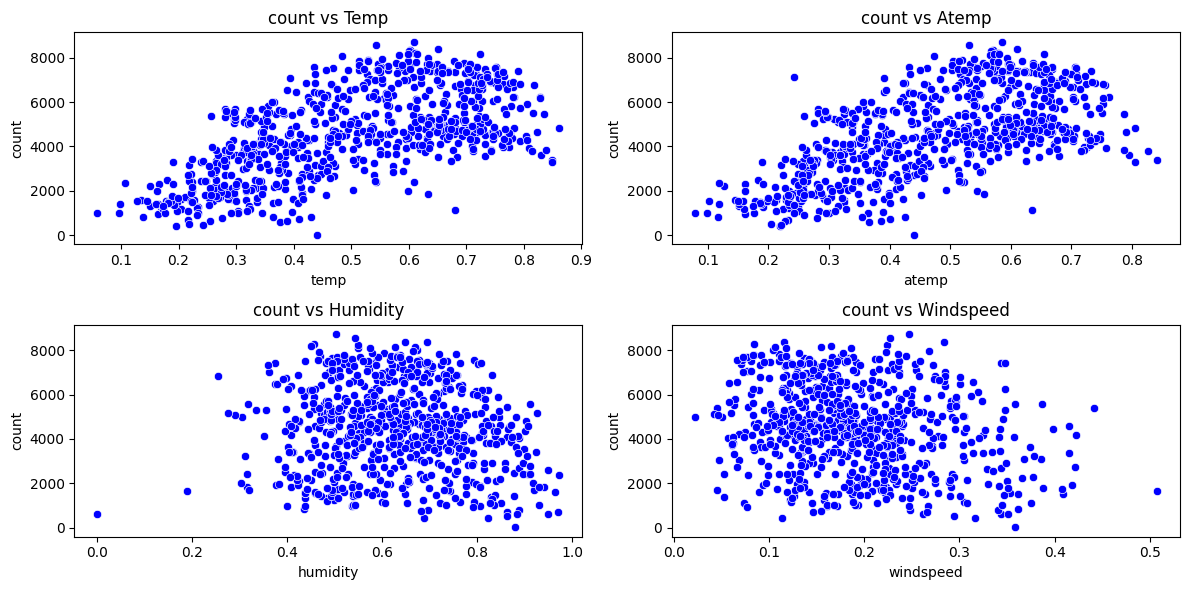

In [131]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
x_variables = ['temp', 'atemp', 'humidity', 'windspeed']

for i, col in enumerate(x_variables):
    sns.scatterplot(x=col, y='count', data=day_df,  ax=axs[i // 2, i % 2], color='blue')
    axs[i // 2, i % 2].set_title(f'count vs {col.capitalize()}')
plt.tight_layout()
plt.show()

mari agar lebih jelas gunakan data jam

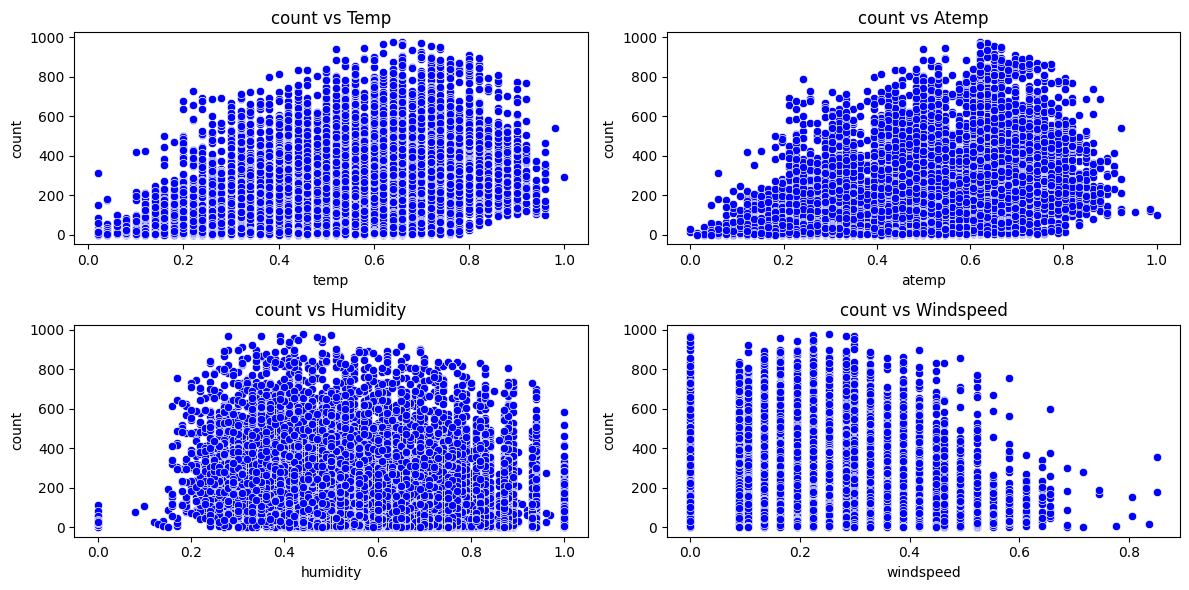

In [132]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
x_variables = ['temp', 'atemp', 'humidity', 'windspeed']

for i, col in enumerate(x_variables):
    sns.scatterplot(x=col, y='count', data=hour_df,  ax=axs[i // 2, i % 2], color='blue')
    axs[i // 2, i % 2].set_title(f'count vs {col.capitalize()}')

plt.tight_layout()
plt.show()

dari plot diatas dapat disimpulkan bahwa :

1.   variabel temp dan atemp memiliki kolerasi positif yang mana jumlah bike-sharing meningkat seiring dengan meningkatnya 'temp' dan 'atemp'
2.   pada variabel 'Humidity' terlihat bahwa tidak ada kolerasi antara kedua variabel
3. pada windspeed kolerasi negatif yang mana jumlah bike-sharing menurun seiring dengan meningkatnya variabel 'windspeed'



## Conclusion



1.   
Berdasarkan grafik, terlihat bahwa jumlah perjalanan bersepeda berbagi bulanan mengikuti tren musiman. Penggunaan sepeda paling tinggi terjadi pada bulan-bulan musim panas (Juni hingga September) dan paling rendah pada bulan-bulan musim dingin (Desember hingga Februari). Hal ini menunjukkan bahwa orang cenderung lebih sering menggunakan sepeda berbagi saat cuaca bagus.
2.   pola penggunaan layanan bike-sharing untuk sepanjang hari, terdapat  dua puncak: satu di pagi hari (sekitar pukul 8-9 pagi) dan yang lainnya di sore hari (sekitar pukul 5-6 sore). Hal ini menunjukkan bahwa orang cenderung menggunakan layanan berbagi sepeda untuk tujuan berkomuting, baik untuk pergi ke tempat kerja di pagi hari atau pulang dari tempat kerja di sore hari.
Jumlah penggunaan sepeda paling rendah selama malam hari (pukul 10 malam hingga 6 pagi).
3. berdasarkan plot yang telah dibuat bahwa ketika menggunakan parameter working_day akan menghasilkan rata rata bahwa working day(4584.82) lebih tinggi daripada not working day(4330.17) demikian juga ketika menggunakan paramter holiday, not holiday lebih tinggi daripada holiday. itu menunjukan bahwa orang orang lebih banyak menggunakan layanan bike-sharing dihari kerja dibandingkan hari libur
4.  berdasarkan grafik yang dihasilkan menunjukkan bahwa musim gugur adalah musim yang paling banyak digunakan untuk bersepeda, dengan persentase 32,2% dari total perjalanan sepeda. Musim panas menempati urutan kedua dengan 27,9%, diikuti oleh musim dingin dengan 25,6%, dan terakhir musim semi dengan 14,3%. Total perjalanan sepeda yang tercatat adalah 32.926.679 kali. Hal ini mungkin menunjukkan bahwa orang lebih suka bersepeda pada musim yang tidak terlalu panas atau dingin, dan menghindari musim yang basah atau berbunga.
5. berdasarkan plot yang diperoleh, terlihat bahwa suhu dan suhu rasa (Atemp) memiliki korelasi positif yang signifikan dengan jumlah penghitungan. Semakin tinggi suhu atau suhu rasa, semakin banyak penghitungan yang terjadi. pada kelembapan tidak terjadi kolerasi apapun atau kelembapan tidak memiliki pengaruh apapun terhadap penggunaan layanan bike-sharing .Namun untuk kecepatan angin memiliki kolerasi negatif ,semakin tinggi kecepatan angin semakin kecil atau turun penggunaan layanan bike-sharing


